In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.fftpack import fft

In [3]:
#Read data from google drive
df = pd.read_csv("/content/drive/MyDrive/final_dataframe.csv")
df

,acc_t,acc_x,acc_y,acc_z,acc_abs,gyro_x,gyro_y,gyro_z,pressure,audio,gyro_t,label,recording_id
0,0.017443,-0.103828,-0.036572,0.013185,0.110867,0.006140,-0.020941,-0.021615,1015.177155,-1.103038e-07,0.017443,noa,0
1,0.027423,0.016966,0.000734,0.003513,0.017341,0.014230,-0.051230,-0.034906,1015.178909,-8.869381e-06,0.027423,noa,0
2,0.037402,0.052361,-0.005830,0.037830,0.064860,0.011364,-0.050322,-0.027478,1015.182571,-1.116034e-05,0.037402,noa,0
3,0.047381,0.028602,0.017169,0.010993,0.035124,0.002096,-0.024613,-0.019981,1015.182571,-4.920312e-06,0.047381,noa,0
4,0.057360,-0.001354,0.054812,-0.055320,0.077888,-0.002218,0.000642,-0.015214,1015.179596,-4.233477e-05,0.057360,noa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,317.512722,10.230064,1.817370,-6.202540,12.100767,-1.841770,5.592062,-3.909607,1019.132919,-2.082650e-03,317.512722,loud,119
119996,317.522702,6.850434,1.542227,-3.071484,7.664262,-2.142571,6.269820,-3.264261,1019.132919,5.044125e-02,317.522702,loud,119
119997,317.532683,0.767209,-3.369860,-5.648490,6.621934,-2.467273,6.947724,-1.943607,1019.132919,1.036744e-02,317.532683,loud,119
119998,317.542664,-3.374713,-8.143878,-8.055034,11.941315,-1.859141,6.271458,-0.947715,1019.132919,-3.588019e-02,317.542664,loud,119


In [4]:
df.columns

Index(['acc_t', 'acc_x', 'acc_y', 'acc_z', 'acc_abs', 'gyro_x', 'gyro_y',
       'gyro_z', 'pressure', 'audio', 'gyro_t', 'label', 'recording_id'],
      dtype='object')

In [5]:
# check quality and compare columns
for column in df.columns:
    na_count = df[column].isna().sum()
    column_length = len(df[column])
    print(f"Column '{column}': {na_count} NaNs, Length: {column_length}")

Column 'acc_t': 0 NaNs, Length: 120000
Column 'acc_x': 0 NaNs, Length: 120000
Column 'acc_y': 0 NaNs, Length: 120000
Column 'acc_z': 0 NaNs, Length: 120000
Column 'acc_abs': 0 NaNs, Length: 120000
Column 'gyro_x': 0 NaNs, Length: 120000
Column 'gyro_y': 0 NaNs, Length: 120000
Column 'gyro_z': 0 NaNs, Length: 120000
Column 'pressure': 0 NaNs, Length: 120000
Column 'audio': 0 NaNs, Length: 120000
Column 'gyro_t': 0 NaNs, Length: 120000
Column 'label': 0 NaNs, Length: 120000
Column 'recording_id': 0 NaNs, Length: 120000


In [6]:
na_count_acc = df[column].isna().sum()

In [7]:
# Basic information about the dataset
print("Number of records:", len(df))
print("Number of columns:", len(df.columns))

Number of records: 120000
Number of columns: 13


In [8]:
# Basic statistics about the dataset
print("\n Descriptive statistics for numerical attributes:")
print(df.describe(include='all'))


 Descriptive statistics for numerical attributes:
                acc_t          acc_x          acc_y          acc_z  \
count   120000.000000  120000.000000  120000.000000  120000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       158.709513       0.715116      -0.588486      -0.194737   
std         91.697835       6.994880       7.695593       5.202588   
min          0.006450     -46.332860     -44.904984     -37.971961   
25%         79.277803      -0.995190      -3.029648      -2.134568   
50%        158.521405       0.013580      -0.045812      -0.008062   
75%        238.356836       1.390618       0.817100       0.644350   
max        317.552643      58.549167      81.035954      69.679136   

              acc_abs         gyro_x         gyro_y         gyro_z  \
count   120000.000000  120000.000000  

## Exploratory Data Analysis

In [9]:
# Creating a dataframe with all accelerometer columns
data1 = pd.DataFrame({
    "acc_x": df['acc_x'],
    "acc_y": df['acc_y'],
    "acc_z": df['acc_z'],
    "acc_abs": df['acc_abs']
})

In [10]:
# Creating a dataframe with all gyroscope columns
data2 = pd.DataFrame({
    "gyro_x": df['gyro_x'],
    "gyro_y": df['gyro_y'],
    "gyro_z": df['gyro_z']
})

<Axes: >

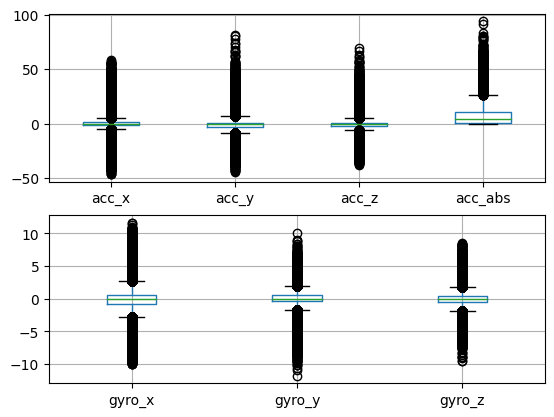

In [11]:
# Creating a Boxplot
plt.subplot(2, 1, 1)
data1.boxplot()

plt.subplot(2, 1, 2)
data2.boxplot()

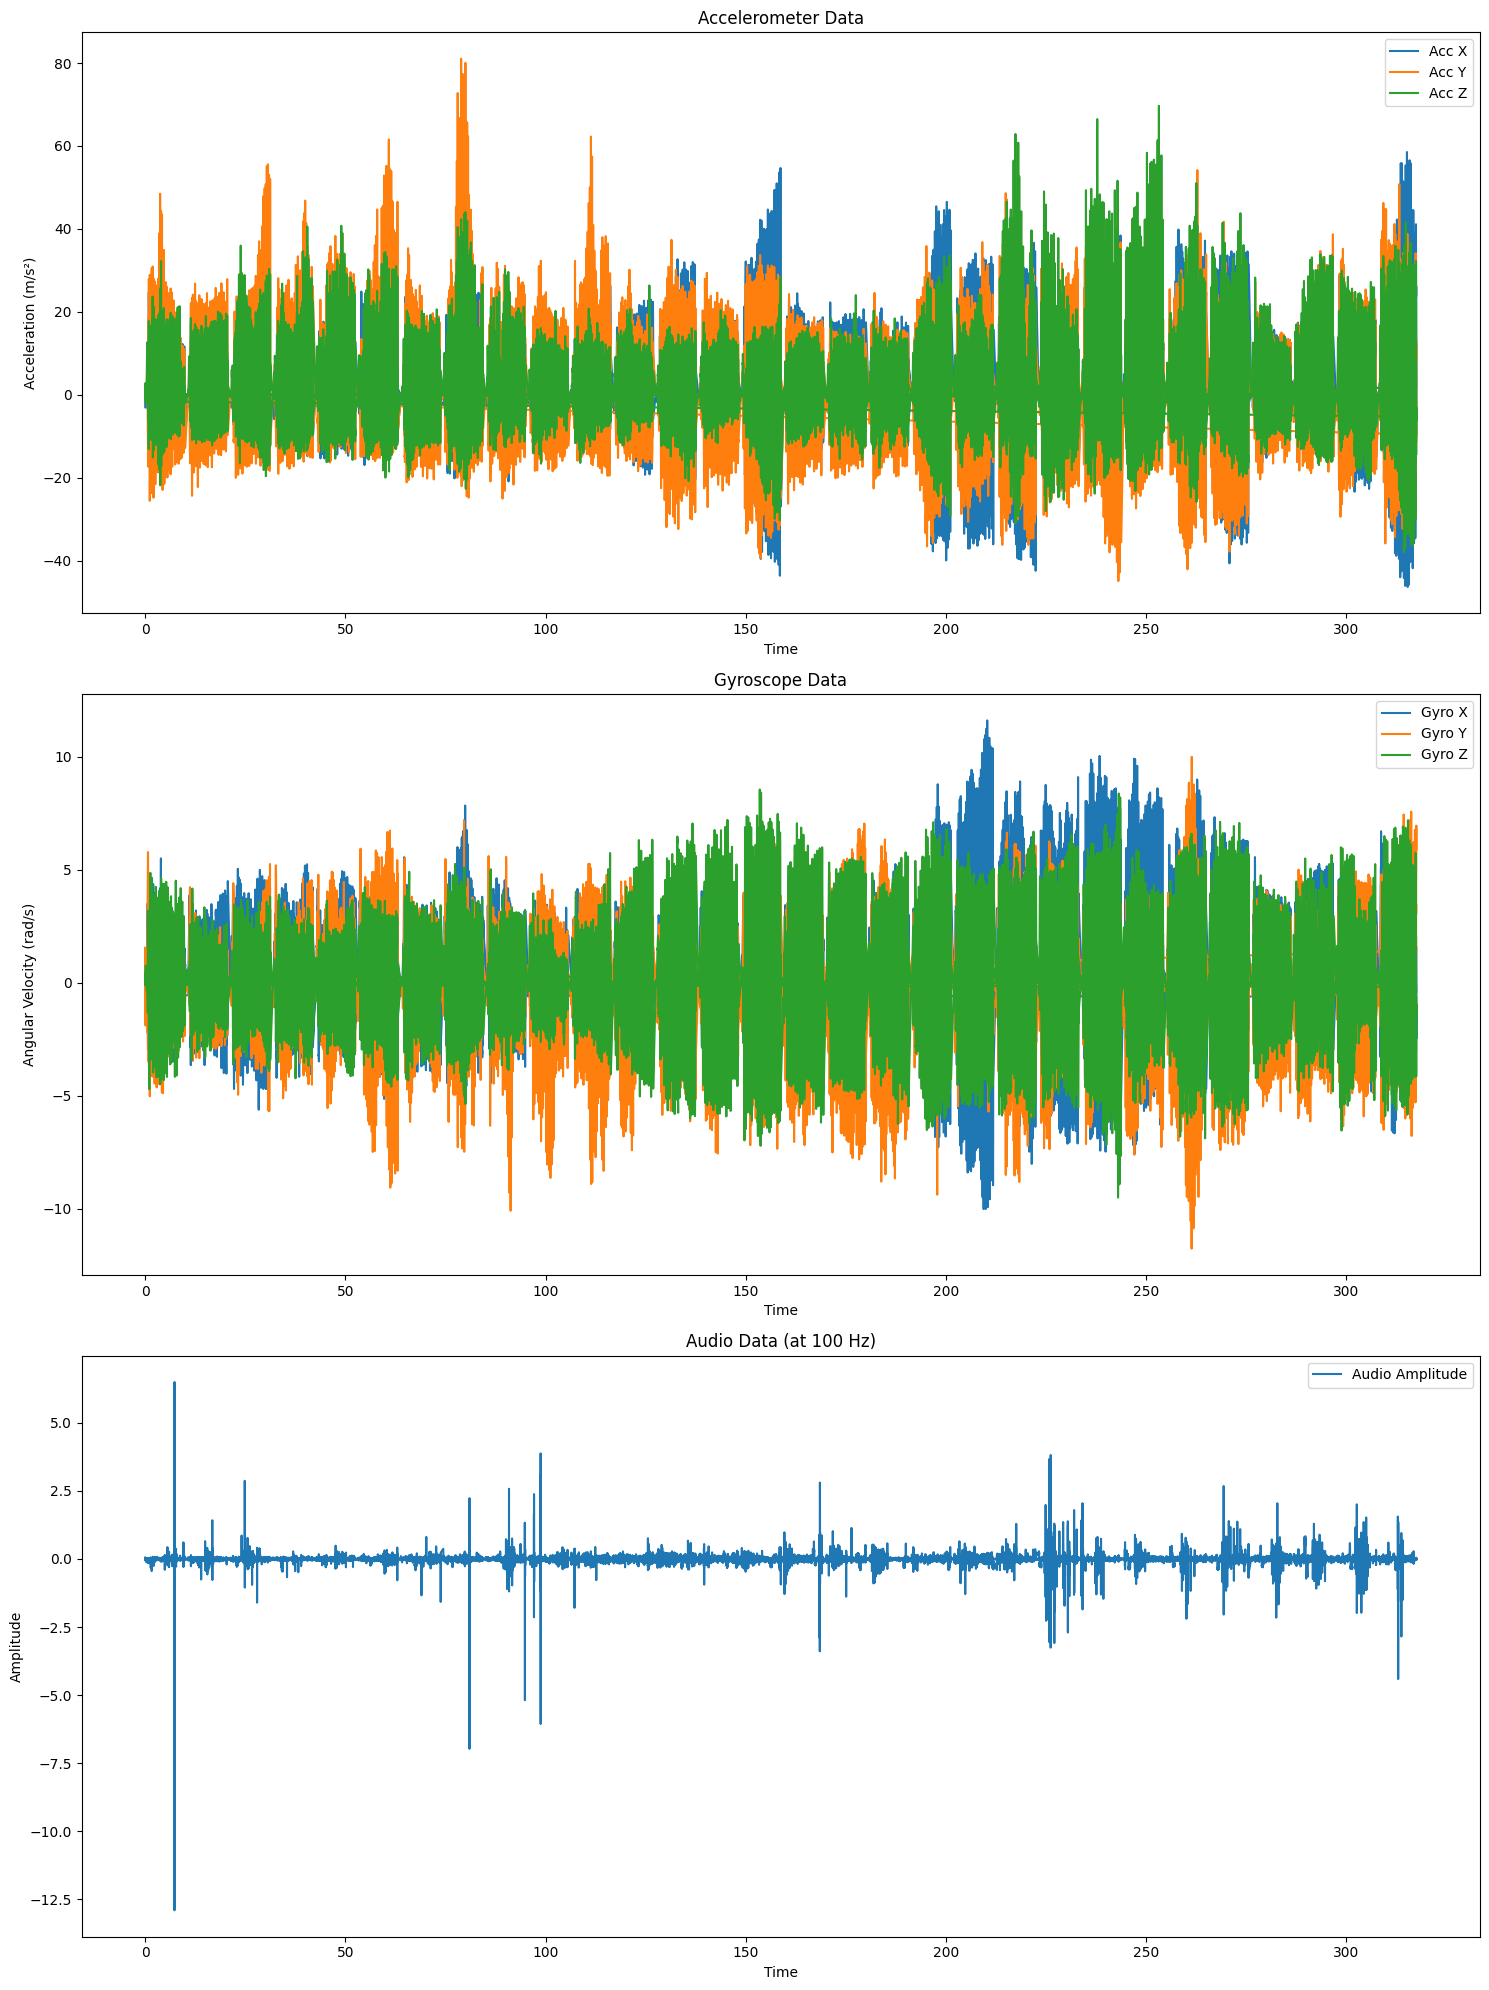

In [12]:
#plots
plt.figure(figsize=(15, 20))

# accelerometer
plt.subplot(3, 1, 1)
plt.plot(df['acc_t'], df['acc_x'], label='Acc X')
plt.plot(df['acc_t'], df['acc_y'], label='Acc Y')
plt.plot(df['acc_t'], df['acc_z'], label='Acc Z')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.title('Accelerometer Data')

# gyroscope
plt.subplot(3, 1, 2)
plt.plot(df['gyro_t'], df['gyro_x'], label='Gyro X')
plt.plot(df['gyro_t'], df['gyro_y'], label='Gyro Y')
plt.plot(df['gyro_t'], df['gyro_z'], label='Gyro Z')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Gyroscope Data')

# Plotting downsampled audio data
plt.subplot(3, 1, 3)
plt.plot(df['acc_t'], df['audio'], label='Audio Amplitude')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Audio Data (at 100 Hz)')

plt.tight_layout()
plt.show()

## Noise reduction
### Lowpass filter for Accelerometer and Gyroscope


In [13]:
from scipy.signal import butter, lfilter, filtfilt

In [14]:
class LowPassFilter:

    def low_pass_filter(self, data_table, col, sampling_frequency, cutoff_frequency, order=5, phase_shift=True):
        # http://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
        # Cutoff frequencies are expressed as the fraction of the Nyquist frequency, which is half the sampling frequency
        nyq = 0.5 * sampling_frequency
        cut = cutoff_frequency / nyq

        b, a = butter(order, cut, btype='low', output='ba', analog=False)
        if phase_shift:
            data_table[col + '_lowpass'] = filtfilt(b, a, data_table[col])
        else:
            data_table[col + '_lowpass'] = lfilter(b, a, data_table[col])
        return data_table

In [15]:
data = df
data.dtypes

acc_t           float64
acc_x           float64
acc_y           float64
acc_z           float64
acc_abs         float64
gyro_x          float64
gyro_y          float64
gyro_z          float64
pressure        float64
audio           float64
gyro_t          float64
label            object
recording_id      int64
dtype: object

In [16]:
# Convert the time columns to numeric format if necessary
data['acc_t'] = pd.to_numeric(data['acc_t'], errors='coerce')
data['gyro_t'] = pd.to_numeric(data['gyro_t'], errors='coerce')

# Calculate the differences between consecutive time entries for both time columns
acc_time_diffs = data['acc_t'].diff().dropna()
gyro_time_diffs = data['gyro_t'].diff().dropna()

# Determine the average sampling interval for both
average_acc_interval = acc_time_diffs.mean()
average_gyro_interval = gyro_time_diffs.mean()

# Compute the sampling frequency for both
acc_sampling_frequency = 1 / average_acc_interval
gyro_sampling_frequency = 1 / average_gyro_interval

acc_sampling_frequency, gyro_sampling_frequency


(377.9077088815599, 377.9077088815599)

In [17]:
LowPass = LowPassFilter()

In [18]:
# Let us study acc_phone_x:
#temp = LowPassFilter
new_df = LowPass.low_pass_filter(data_table=df, col='acc_x', sampling_frequency=acc_sampling_frequency, cutoff_frequency=2.5, order=10)
new_df = LowPass.low_pass_filter(data_table=df, col='acc_y', sampling_frequency=acc_sampling_frequency, cutoff_frequency=2.5, order=10)
new_df = LowPass.low_pass_filter(data_table=df, col='acc_z', sampling_frequency=acc_sampling_frequency, cutoff_frequency=2.5, order=10)
new_df = LowPass.low_pass_filter(data_table=df, col='gyro_x', sampling_frequency=gyro_sampling_frequency, cutoff_frequency=2.5, order=10)
new_df = LowPass.low_pass_filter(data_table=df, col='gyro_y', sampling_frequency=gyro_sampling_frequency, cutoff_frequency=2.5, order=10)
new_df = LowPass.low_pass_filter(data_table=df, col='gyro_z', sampling_frequency=gyro_sampling_frequency, cutoff_frequency=2.5, order=10)

Text(0.5, 1.0, 'Accelerometer Data')

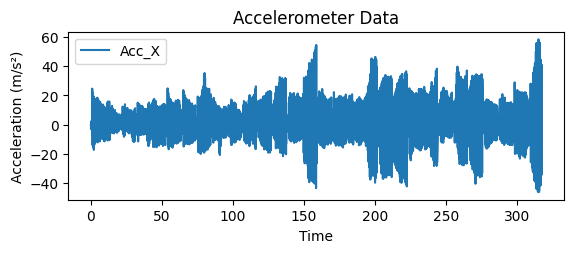

In [19]:
# accelerometer data after lowpass filter
plt.subplot(2, 1, 1)
plt.plot(new_df['acc_t'], new_df['acc_x'], label='Acc_X')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.title('Accelerometer Data')

# PCA

In [20]:
from sklearn.decomposition import PCA

# Class for Principal Component Analysis. We can only apply this when we do not have missing values (i.e. NaN).
# For this we have to impute these first, be aware of this.
class PrincipalComponentAnalysis:

    pca = []

    def __init__(self):
        self.pca = []

    # Perform the PCA on the selected columns and return the explained variance.
    def determine_pc_explained_variance(self, data_table, cols):

        # perform the PCA.
        self.pca = PCA(n_components = len(cols))
        self.pca.fit(new_df[cols])
        # And return the explained variances.
        return self.pca.explained_variance_ratio_

    # Apply a PCA given the number of components we have selected.
    # We add new pca columns.
    def apply_pca(self, data_table, cols, number_comp):

        # perform the PCA.
        self.pca = PCA(n_components = number_comp)
        self.pca.fit(new_df[cols])

        # Transform our old values.
        new_values = self.pca.transform(new_df[cols])

        #And add the new ones:
        for comp in range(0, number_comp):
            data_table['pca_' +str(comp+1)] = new_values[:,comp]
        return data_table


In [21]:
temp = PrincipalComponentAnalysis()

In [22]:
selected_predictor_cols = [c for c in new_df.columns if (
    not ('label' in c)) and (not (c == 'hr_watch_rate'))]
pc_values = temp.determine_pc_explained_variance(
    new_df, selected_predictor_cols)

In [23]:
n_pcs = 7

new_df = temp.apply_pca(new_df, selected_predictor_cols, n_pcs)

## Feature Engineering

# train test split

70-30 split in a stratified way

In [24]:
# Check if the columns exist in the dataframe
required_columns = ['acc_x', 'acc_y', 'acc_z']
for column in required_columns:
    if column not in df.columns:
        raise KeyError(f"Column '{column}' is not in the dataframe")

# Time domain features
window_size = 50  # Define the window size

# Helper function to compute slope (trend)
def compute_slope(series):
    x = np.arange(len(series))
    if len(series) < 2 or np.any(np.isnan(series)) or np.any(np.isinf(series)):
        return np.nan
    try:
        slope, _ = np.polyfit(x, series, 1)
    except np.linalg.LinAlgError:
        return np.nan
    return slope

# Compute rolling features
time_features = pd.DataFrame()
time_features['acc_x_mean'] = df['acc_x'].rolling(window=window_size, min_periods=1).mean()
time_features['acc_y_mean'] = df['acc_y'].rolling(window=window_size, min_periods=1).mean()
time_features['acc_z_mean'] = df['acc_z'].rolling(window=window_size, min_periods=1).mean()
time_features['acc_x_std'] = df['acc_x'].rolling(window=window_size, min_periods=1).std()
time_features['acc_y_std'] = df['acc_y'].rolling(window=window_size, min_periods=1).std()
time_features['acc_z_std'] = df['acc_z'].rolling(window=window_size, min_periods=1).std()
time_features['acc_x_slope'] = df['acc_x'].rolling(window=window_size, min_periods=1).apply(compute_slope, raw=False)
time_features['acc_y_slope'] = df['acc_y'].rolling(window=window_size, min_periods=1).apply(compute_slope, raw=False)
time_features['acc_z_slope'] = df['acc_z'].rolling(window=window_size, min_periods=1).apply(compute_slope, raw=False)

# Frequency domain features

def compute_dominant_freq(series):
    fft_result = np.fft.fft(series)
    frequencies = np.fft.fftfreq(len(series))
    magnitudes = np.abs(fft_result)
    dominant_freq = frequencies[np.argmax(magnitudes)]
    return dominant_freq

def compute_weighted_freq(series):
    fft_result = np.fft.fft(series)
    frequencies = np.fft.fftfreq(len(series))
    magnitudes = np.abs(fft_result)
    weighted_freq = np.sum(frequencies * magnitudes) / np.sum(magnitudes)
    return weighted_freq

def compute_entropy(series):
    fft_result = np.fft.fft(series)
    magnitudes = np.abs(fft_result)
    power = np.square(magnitudes)
    power_norm = power / np.sum(power)
    entropy = -np.sum(power_norm * np.log2(power_norm))
    return entropy

# Apply FFT to the data in windows separately for each feature
freq_features = pd.DataFrame()
freq_features['acc_x_dominant_freq'] = df['acc_x'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_dominant_freq(x), raw=False)
freq_features['acc_x_weighted_freq'] = df['acc_x'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_weighted_freq(x), raw=False)
freq_features['acc_x_entropy'] = df['acc_x'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_entropy(x), raw=False)
freq_features['acc_y_dominant_freq'] = df['acc_y'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_dominant_freq(x), raw=False)
freq_features['acc_y_weighted_freq'] = df['acc_y'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_weighted_freq(x), raw=False)
freq_features['acc_y_entropy'] = df['acc_y'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_entropy(x), raw=False)
freq_features['acc_z_dominant_freq'] = df['acc_z'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_dominant_freq(x), raw=False)
freq_features['acc_z_weighted_freq'] = df['acc_z'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_weighted_freq(x), raw=False)
freq_features['acc_z_entropy'] = df['acc_z'].rolling(window=window_size, min_periods=1).apply(lambda x: compute_entropy(x), raw=False)

# Combine the time domain and frequency domain features
features = pd.concat([time_features, freq_features], axis=1)

# Display the first few rows of the engineered features
print(features.head())


   acc_x_mean  acc_y_mean  acc_z_mean  acc_x_std  acc_y_std  acc_z_std  \
0   -0.103828   -0.036572    0.013185        NaN        NaN        NaN   
1   -0.043431   -0.017919    0.008349   0.085414   0.026379   0.006839   
2   -0.011500   -0.013889    0.018176   0.081893   0.019916   0.017695   
3   -0.001475   -0.006125    0.016380   0.069807   0.022485   0.014887   
4   -0.001451    0.006063    0.002040   0.060455   0.033494   0.034560   

   acc_x_slope  acc_y_slope  acc_z_slope  acc_x_dominant_freq  \
0          NaN          NaN          NaN             0.000000   
1     0.120794     0.037305    -0.009672            -0.500000   
2     0.078094     0.015371     0.012323             0.333333   
3     0.043268     0.015466     0.002774             0.250000   
4     0.021658     0.019920    -0.012953             0.200000   

   acc_x_weighted_freq  acc_x_entropy  acc_y_dominant_freq  \
0         0.000000e+00      -0.000000                  0.0   
1        -2.908513e-01       0.925625   

# Feature Selection

In [25]:

import uuid


# Create a DataFrame
df_new1 = pd.DataFrame(features)
df_new2 = pd.DataFrame(df)
# Function to generate UUID for each row
def generate_uuid(row):
    return uuid.uuid4()

# Add a new column 'ID' with generated UUIDs
df_new1['ID'] = df.apply(generate_uuid, axis=1)
df_new2['ID'] = df.apply(generate_uuid, axis=1)
df3 = pd.merge(df_new1, df_new2)
df3.head()

,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,acc_y_std,acc_z_std,acc_x_slope,acc_y_slope,acc_z_slope,acc_x_dominant_freq,...,gyro_x_lowpass,gyro_y_lowpass,gyro_z_lowpass,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7


In [26]:
features = df['label']

In [27]:
# Assuming 'target' is the column we want to predict, replace with the actual target column name
target_column = 'label'  #  'target' with the actual column name
features = df.drop(columns=[target_column])
target = df[target_column]
df.dropna()
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print("Features and target separated.")


Features and target separated.


In [28]:
for column in df.columns:
    na_count = df[column].isna().sum()
    column_length = len(df[column])
    print(f"Column '{column}': {na_count} NaNs, Length: {column_length}")

Column 'acc_t': 0 NaNs, Length: 120000
Column 'acc_x': 0 NaNs, Length: 120000
Column 'acc_y': 0 NaNs, Length: 120000
Column 'acc_z': 0 NaNs, Length: 120000
Column 'acc_abs': 0 NaNs, Length: 120000
Column 'gyro_x': 0 NaNs, Length: 120000
Column 'gyro_y': 0 NaNs, Length: 120000
Column 'gyro_z': 0 NaNs, Length: 120000
Column 'pressure': 0 NaNs, Length: 120000
Column 'audio': 0 NaNs, Length: 120000
Column 'gyro_t': 0 NaNs, Length: 120000
Column 'label': 0 NaNs, Length: 120000
Column 'recording_id': 0 NaNs, Length: 120000
Column 'acc_x_lowpass': 0 NaNs, Length: 120000
Column 'acc_y_lowpass': 0 NaNs, Length: 120000
Column 'acc_z_lowpass': 0 NaNs, Length: 120000
Column 'gyro_x_lowpass': 0 NaNs, Length: 120000
Column 'gyro_y_lowpass': 0 NaNs, Length: 120000
Column 'gyro_z_lowpass': 0 NaNs, Length: 120000
Column 'pca_1': 0 NaNs, Length: 120000
Column 'pca_2': 0 NaNs, Length: 120000
Column 'pca_3': 0 NaNs, Length: 120000
Column 'pca_4': 0 NaNs, Length: 120000
Column 'pca_5': 0 NaNs, Length: 1200

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature importances:")
print(feature_importance_df.head(10))


Feature importances:
          Feature  Importance
19          pca_2    0.249213
11   recording_id    0.230881
8        pressure    0.211050
13  acc_y_lowpass    0.070043
4         acc_abs    0.046628
21          pca_4    0.040758
12  acc_x_lowpass    0.039186
14  acc_z_lowpass    0.034649
22          pca_5    0.017399
20          pca_3    0.013683


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'top_features' is an array of important features, you can adjust the number of top features to use
top_features = feature_importance_df.head(5)['Feature'].values

# Filter the original dataset to include only the top features
filtered_df = df[top_features]

# Split the filtered dataset
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(filtered_df, target, test_size=0.3, random_state=42)

# Train a new model using only the top features
model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
model_filtered.fit(X_train_filtered, y_train)

# Make predictions
y_pred = model_filtered.predict(X_test_filtered)

# Evaluate performance in four categories
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Performance metrics using top features:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Performance metrics using top features:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# Random Forest

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your DataFrame and 'target' is your target variable.
# Example DataFrame 'df' and 'target'


# Here, I'll use the top 5 features from the previous methods for simplicity
# In practice, you would replace this with your selected features
#selected_features = df.columns[:5]

# Select the features
X = df[top_features]
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       light       1.00      1.00      1.00      9170
        loud       1.00      1.00      1.00      8862
      medium       1.00      1.00      1.00      8978
         noa       1.00      1.00      1.00      8990

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000

Confusion Matrix:
[[9170    0    0    0]
 [   0 8862    0    0]
 [   0    0 8978    0]
 [   0    0    0 8990]]
